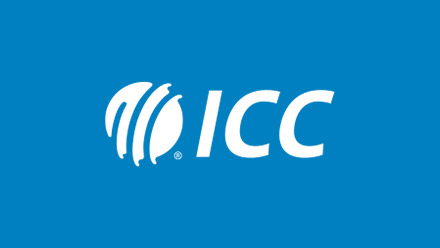

#  ICC Men's TEST Analysis

### Batting Records Data Cleaning

In [1]:
# importing necessary libraries for data cleaning
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('TEST_batting_records.csv')

In [3]:
# Reviewing the data
df.head(5)

,name,span,matches,innings,not_out,runs,highest_score,average,century,half_century,ducks
0,SR Tendulkar (IND),1990-2013,196,323,33,15706,248*,54.15,51,66,14
1,RT Ponting (AUS),1995-2012,168,287,29,13378,257,51.85,41,62,17
2,JH Kallis (ICC/SA),1995-2013,166,280,40,13289,224,55.37,45,58,16
3,R Dravid (ICC/IND),1996-2012,164,286,32,13288,270,52.31,36,63,8
4,AN Cook (ENG),2006-2018,161,291,16,12472,294,45.35,33,57,9


In [4]:
df.shape

(1490, 11)

In [5]:
# Checking for any null values or any missing data
df.isnull().sum()

name             0
span             0
matches          0
innings          0
not_out          0
runs             0
highest_score    0
average          0
century          0
half_century     0
ducks            0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           1490 non-null   object
 1   span           1490 non-null   object
 2   matches        1490 non-null   int64 
 3   innings        1490 non-null   object
 4   not_out        1490 non-null   object
 5   runs           1490 non-null   object
 6   highest_score  1490 non-null   object
 7   average        1490 non-null   object
 8   century        1490 non-null   object
 9   half_century   1490 non-null   object
 10  ducks          1490 non-null   object
dtypes: int64(1), object(10)
memory usage: 128.2+ KB


In [7]:
# splitting the name such that we have two columns - name and country
df['country'] = df['name'].str.rsplit(' ',n=1).str.get(1)
df['name'] = df['name'].str.rsplit(' ',n=1).str.get(0) 

In [8]:
df.head(5)

,name,span,matches,innings,not_out,runs,highest_score,average,century,half_century,ducks,country
0,SR Tendulkar,1990-2013,196,323,33,15706,248*,54.15,51,66,14,(IND)
1,RT Ponting,1995-2012,168,287,29,13378,257,51.85,41,62,17,(AUS)
2,JH Kallis,1995-2013,166,280,40,13289,224,55.37,45,58,16,(ICC/SA)
3,R Dravid,1996-2012,164,286,32,13288,270,52.31,36,63,8,(ICC/IND)
4,AN Cook,2006-2018,161,291,16,12472,294,45.35,33,57,9,(ENG)


In [9]:
# Reviewing the country column
df.country

0           (IND)
1           (AUS)
2        (ICC/SA)
3       (ICC/IND)
4           (ENG)
          ...    
1485        (AFG)
1486         (WI)
1487        (PAK)
1488        (PAK)
1489         (SA)
Name: country, Length: 1490, dtype: object

In [10]:
# Extracting all the text from the paranthesis
df['country'] = df['country'].str.extract(r'\((.*?)\)')

In [11]:
# Creating a list such that every entry separated by '/' is available
a = df['country'].str.split('/')

In [12]:
b = []
for i in a:
    
    if i[-1] != "ICC":  # checking if the last element is not ICC
        b.append(i[-1])
    else:               # the first element is important
         b.append(i[0])

In [13]:
# Converting the list to series
b = pd.Series(b)

In [14]:
# Modifying the country column
df['country']=b

In [15]:
df.head(5)

,name,span,matches,innings,not_out,runs,highest_score,average,century,half_century,ducks,country
0,SR Tendulkar,1990-2013,196,323,33,15706,248*,54.15,51,66,14,IND
1,RT Ponting,1995-2012,168,287,29,13378,257,51.85,41,62,17,AUS
2,JH Kallis,1995-2013,166,280,40,13289,224,55.37,45,58,16,SA
3,R Dravid,1996-2012,164,286,32,13288,270,52.31,36,63,8,IND
4,AN Cook,2006-2018,161,291,16,12472,294,45.35,33,57,9,ENG


In [16]:
# necessary columns to be numeric
num_col = ['matches','innings','not_out','runs','highest_score','average','century','half_century','ducks']

In [17]:
# making a copy of dataframe for the cleaning purpose
df2 = df[num_col]

In [18]:
# checkimg the innings column
df2.innings.unique()

array(['323', '287', '280', '286', '291', '233', '232', '252', '257',
       '213', '195', '215', '205', '206', '191', '200', '225', '176',
       '198', '184', '180', '235', '181', '209', '182', '196', '208',
       '193', '156', '188', '189', '178', '174', '179', '185', '166',
       '137', '154', '143', '171', '147', '163', '145', '142', '132',
       '131', '128', '152', '134', '144', '112', '115', '129', '123',
       '109', '108', '99', '83', '118', '104', '101', '90', '114', '91',
       '96', '105', '159', '127', '94', '130', '93', '117', '111', '244',
       '102', '141', '81', '199', '77', '162', '95', '97', '87', '100',
       '126', '86', '76', '113', '65', '119', '73', '92', '70', '82',
       '80', '89', '79', '56', '173', '72', '67', '68', '55', '58', '71',
       '74', '64', '85', '48', '63', '107', '62', '78', '69', '60', '61',
       '42', '59', '54', '33', '44', '66', '37', '46', '39', '49', '57',
       '36', '31', '52', '38', '41', '40', '84', '43', '264', '47', '3

In [19]:
# '-' element cannot be converted into the numeric format, removing all the rows with '-' 
df3 = pd.DataFrame()
for i in df2.columns:
    df3[i]=df2[df2[i]!='-'][i]

In [20]:
# after copying the temporary dataframe some values tend to be missing and we are eliminating those rows
df2 = df3
df2.dropna(inplace=True)

In [21]:
# copying the changes in the original dataframe
df[num_col]=df2

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           1490 non-null   object 
 1   span           1490 non-null   object 
 2   matches        1451 non-null   float64
 3   innings        1451 non-null   object 
 4   not_out        1451 non-null   object 
 5   runs           1451 non-null   object 
 6   highest_score  1451 non-null   object 
 7   average        1451 non-null   object 
 8   century        1451 non-null   object 
 9   half_century   1451 non-null   object 
 10  ducks          1451 non-null   object 
 11  country        1490 non-null   object 
dtypes: float64(1), object(11)
memory usage: 139.8+ KB


In [23]:
df.isnull().sum()

name              0
span              0
matches          39
innings          39
not_out          39
runs             39
highest_score    39
average          39
century          39
half_century     39
ducks            39
country           0
dtype: int64

In [24]:
df.dropna(inplace=True)

In [25]:
df.innings.unique()

array(['323', '287', '280', '286', '291', '233', '232', '252', '257',
       '213', '195', '215', '205', '206', '191', '200', '225', '176',
       '198', '184', '180', '235', '181', '209', '182', '196', '208',
       '193', '156', '188', '189', '178', '174', '179', '185', '166',
       '137', '154', '143', '171', '147', '163', '145', '142', '132',
       '131', '128', '152', '134', '144', '112', '115', '129', '123',
       '109', '108', '99', '83', '118', '104', '101', '90', '114', '91',
       '96', '105', '159', '127', '94', '130', '93', '117', '111', '244',
       '102', '141', '81', '199', '77', '162', '95', '97', '87', '100',
       '126', '86', '76', '113', '65', '119', '73', '92', '70', '82',
       '80', '89', '79', '56', '173', '72', '67', '68', '55', '58', '71',
       '74', '64', '85', '48', '63', '107', '62', '78', '69', '60', '61',
       '42', '59', '54', '33', '44', '66', '37', '46', '39', '49', '57',
       '36', '31', '52', '38', '41', '40', '84', '43', '264', '47', '3

In [26]:
# checking for highest_score column
df.highest_score.unique()

array(['248*', '257', '224', '270', '294', '319', '400*', '203*', '374',
       '254', '313', '239', '311*', '277', '200', '254*', '329', '335*',
       '281', '278*', '251', '329*', '380', '190', '227', '153*', '235',
       '250', '290', '185*', '200*', '223', '275', '333', '206*', '274*',
       '302*', '177', '340', '244', '302', '258', '334*', '195', '228',
       '167*', '291', '219', '207', '197', '219*', '204*', '125', '212',
       '249', '193', '231', '195*', '264*', '267', '199', '161*', '206',
       '233', '188', '232*', '222', '137', '275*', '140', '217', '165',
       '164*', '173*', '157', '215', '245', '131*', '181', '188*', '192',
       '167', '260', '196', '226', '205', '111', '176', '135', '162*',
       '169', '173', '218', '175', '131', '201*', '178', '124', '141*',
       '158', '99', '237', '142', '155*', '100*', '175*', '118', '113',
       '208*', '172', '236', '150*', '152', '112*', '166', '208', '110',
       '103', '211', '202*', '145', '96', '158*', '182'

In [27]:
# removing the '*' from the hihgest_score
high_score = []
for i in df.highest_score:
    
        if(i[-1]=='*'):
            high_score.append(i[:-1])
        else: 
            high_score.append(i)

In [28]:
df['highest_score']=high_score

In [29]:
df.head()

,name,span,matches,innings,not_out,runs,highest_score,average,century,half_century,ducks,country
0,SR Tendulkar,1990-2013,196.0,323,33,15706,248,54.15,51,66,14,IND
1,RT Ponting,1995-2012,168.0,287,29,13378,257,51.85,41,62,17,AUS
2,JH Kallis,1995-2013,166.0,280,40,13289,224,55.37,45,58,16,SA
3,R Dravid,1996-2012,164.0,286,32,13288,270,52.31,36,63,8,IND
4,AN Cook,2006-2018,161.0,291,16,12472,294,45.35,33,57,9,ENG


In [30]:
df4 = df[num_col]

In [31]:
# converting to numeric columns

df5 = pd.DataFrame()
for i in df4.columns:
    df5[i]=pd.to_numeric(df4[i])

In [32]:
df[num_col]=df5

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1451 entries, 0 to 1479
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           1451 non-null   object 
 1   span           1451 non-null   object 
 2   matches        1451 non-null   float64
 3   innings        1451 non-null   int64  
 4   not_out        1451 non-null   int64  
 5   runs           1451 non-null   int64  
 6   highest_score  1451 non-null   int64  
 7   average        1451 non-null   float64
 8   century        1451 non-null   int64  
 9   half_century   1451 non-null   int64  
 10  ducks          1451 non-null   int64  
 11  country        1451 non-null   object 
dtypes: float64(2), int64(7), object(3)
memory usage: 147.4+ KB


In [34]:
# exporting the cleaned data to csv format
df.to_csv('TEST_batting_records_clean.csv',index=False)

### Bowling Records Data Cleaning

In [35]:
df2 = pd.read_csv('TEST_bowling_record.csv')

In [36]:
# Reviewing the data
df2.head()

,name,span,matches,innings,overs,maiden_overs,runs_conceded,wickets,best_bowling_inning,best_bowling_match,average,economy_rate,bowling_strike_rate,five_wickets_haul,ten_wickets_haul
0,M Muralidaran (ICC/SL),1992-2010,133,230,7339.5,1794,18180,800,9/51,16/220,22.72,2.47,55.0,67,22
1,SK Warne (AUS),1992-2007,145,273,6784.1,1761,17995,708,8/71,12/128,25.41,2.65,57.4,37,10
2,JM Anderson (ENG),2003-2024,187,348,6646.1,1720,18569,700,7/42,11/71,26.52,2.79,56.9,32,3
3,A Kumble (IND),1990-2008,132,236,6808.2,1576,18355,619,10/74,14/149,29.65,2.69,65.9,35,8
4,SCJ Broad (ENG),2007-2023,167,309,5616.2,1304,16719,604,8/15,11/121,27.68,2.97,55.7,20,3


In [37]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   name                 1490 non-null   object
 1   span                 1490 non-null   object
 2   matches              1490 non-null   int64 
 3   innings              1490 non-null   object
 4   overs                1490 non-null   object
 5   maiden_overs         1490 non-null   object
 6   runs_conceded        1490 non-null   object
 7   wickets              1490 non-null   object
 8   best_bowling_inning  1490 non-null   object
 9   best_bowling_match   1490 non-null   object
 10  average              1490 non-null   object
 11  economy_rate         1490 non-null   object
 12  bowling_strike_rate  1490 non-null   object
 13  five_wickets_haul    1490 non-null   object
 14  ten_wickets_haul     1490 non-null   object
dtypes: int64(1), object(14)
memory usage: 174.7+ KB


In [38]:
# Checking for any null values or any missing data
df2.isnull().sum()

name                   0
span                   0
matches                0
innings                0
overs                  0
maiden_overs           0
runs_conceded          0
wickets                0
best_bowling_inning    0
best_bowling_match     0
average                0
economy_rate           0
bowling_strike_rate    0
five_wickets_haul      0
ten_wickets_haul       0
dtype: int64

In [39]:
# splitting the name such that we have two columns - name and country
df2['country'] = df2['name'].str.rsplit(' ',n=1).str.get(1)
df2['name'] = df2['name'].str.rsplit(' ',n=1).str.get(0) 

In [40]:
df2['country'] = df2['country'].str.extract(r'\((.*?)\)')

In [41]:
# Creating a list such that every entry separated by '/' is available
a = df2['country'].str.split('/')

In [42]:
b = []
for i in a:
    
    if i[-1] != "ICC":  # checking if the last element is not ICC
        b.append(i[-1])
    else:               # the first element is important
         b.append(i[0])

In [43]:
# Modifying the country column
b = pd.Series(b)
df2['country']=b

In [44]:
df2.head()

,name,span,matches,innings,overs,maiden_overs,runs_conceded,wickets,best_bowling_inning,best_bowling_match,average,economy_rate,bowling_strike_rate,five_wickets_haul,ten_wickets_haul,country
0,M Muralidaran,1992-2010,133,230,7339.5,1794,18180,800,9/51,16/220,22.72,2.47,55.0,67,22,SL
1,SK Warne,1992-2007,145,273,6784.1,1761,17995,708,8/71,12/128,25.41,2.65,57.4,37,10,AUS
2,JM Anderson,2003-2024,187,348,6646.1,1720,18569,700,7/42,11/71,26.52,2.79,56.9,32,3,ENG
3,A Kumble,1990-2008,132,236,6808.2,1576,18355,619,10/74,14/149,29.65,2.69,65.9,35,8,IND
4,SCJ Broad,2007-2023,167,309,5616.2,1304,16719,604,8/15,11/121,27.68,2.97,55.7,20,3,ENG


In [45]:
df2.country.value_counts()

country
ENG    194
WI     162
PAK    161
IND    142
AUS    139
NZ     136
SL     135
SA     131
ZIM    126
BAN    104
AFG     32
IRE     28
Name: count, dtype: int64

In [46]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   name                 1490 non-null   object
 1   span                 1490 non-null   object
 2   matches              1490 non-null   int64 
 3   innings              1490 non-null   object
 4   overs                1490 non-null   object
 5   maiden_overs         1490 non-null   object
 6   runs_conceded        1490 non-null   object
 7   wickets              1490 non-null   object
 8   best_bowling_inning  1490 non-null   object
 9   best_bowling_match   1490 non-null   object
 10  average              1490 non-null   object
 11  economy_rate         1490 non-null   object
 12  bowling_strike_rate  1490 non-null   object
 13  five_wickets_haul    1490 non-null   object
 14  ten_wickets_haul     1490 non-null   object
 15  country              1490 non-null   object
dtypes: int

In [47]:
df2.innings.unique()

array(['230', '273', '348', '236', '309', '243', '242', '189', '171',
       '170', '202', '190', '179', '150', '187', '194', '146', '129',
       '132', '149', '140', '165', '188', '160', '136', '272', '112',
       '147', '115', '122', '137', '109', '89', '113', '121', '105',
       '126', '95', '119', '103', '102', '85', '86', '82', '67', '74',
       '104', '97', '90', '78', '69', '83', '91', '88', '61', '63', '76',
       '62', '66', '71', '70', '59', '56', '52', '73', '48', '50', '125',
       '44', '72', '68', '54', '43', '49', '51', '58', '53', '55', '60',
       '42', '32', '34', '46', '65', '38', '36', '84', '35', '45', '40',
       '37', '64', '93', '41', '28', '22', '31', '27', '47', '145', '39',
       '33', '26', '29', '23', '128', '30', '77', '94', '25', '15', '19',
       '100', '143', '21', '24', '57', '16', '12', '18', '20', '14', '17',
       '81', '9', '99', '11', '13', '10', '8', '7', '6', '5', '4', '3',
       '2', '1', '-'], dtype=object)

In [48]:
df2.innings.value_counts()

innings
-      347
2      139
1      133
4       83
6       60
      ... 
128      1
77       1
94       1
272      1
230      1
Name: count, Length: 138, dtype: int64

In [49]:
# necessary columns to be numeric
num_col = ['innings','overs','maiden_overs','runs_conceded','wickets','average','economy_rate','bowling_strike_rate','five_wickets_haul','ten_wickets_haul']

In [50]:
# reviewing the inninigs column
df2.innings.unique()

array(['230', '273', '348', '236', '309', '243', '242', '189', '171',
       '170', '202', '190', '179', '150', '187', '194', '146', '129',
       '132', '149', '140', '165', '188', '160', '136', '272', '112',
       '147', '115', '122', '137', '109', '89', '113', '121', '105',
       '126', '95', '119', '103', '102', '85', '86', '82', '67', '74',
       '104', '97', '90', '78', '69', '83', '91', '88', '61', '63', '76',
       '62', '66', '71', '70', '59', '56', '52', '73', '48', '50', '125',
       '44', '72', '68', '54', '43', '49', '51', '58', '53', '55', '60',
       '42', '32', '34', '46', '65', '38', '36', '84', '35', '45', '40',
       '37', '64', '93', '41', '28', '22', '31', '27', '47', '145', '39',
       '33', '26', '29', '23', '128', '30', '77', '94', '25', '15', '19',
       '100', '143', '21', '24', '57', '16', '12', '18', '20', '14', '17',
       '81', '9', '99', '11', '13', '10', '8', '7', '6', '5', '4', '3',
       '2', '1', '-'], dtype=object)

In [51]:
# making a copy of dataframe for the cleaning purpose
df3 = df2[num_col]

In [52]:
# '-' element cannot be converted into the numeric format, removing all the rows with '-'    : there are 631 entries
df4 = pd.DataFrame()
for i in df3.columns:
    df4[i]=df3[df3[i]!='-'][i]

In [53]:
df3 = df4
df3.dropna(inplace=True)

In [54]:
# copying the changes in the original dataframe
df2[num_col]=df3

In [55]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   name                 1490 non-null   object
 1   span                 1490 non-null   object
 2   matches              1490 non-null   int64 
 3   innings              937 non-null    object
 4   overs                937 non-null    object
 5   maiden_overs         937 non-null    object
 6   runs_conceded        937 non-null    object
 7   wickets              937 non-null    object
 8   best_bowling_inning  1490 non-null   object
 9   best_bowling_match   1490 non-null   object
 10  average              937 non-null    object
 11  economy_rate         937 non-null    object
 12  bowling_strike_rate  937 non-null    object
 13  five_wickets_haul    937 non-null    object
 14  ten_wickets_haul     937 non-null    object
 15  country              1490 non-null   object
dtypes: int

In [56]:
df2.dropna(inplace=True)

In [57]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 937 entries, 0 to 936
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   name                 937 non-null    object
 1   span                 937 non-null    object
 2   matches              937 non-null    int64 
 3   innings              937 non-null    object
 4   overs                937 non-null    object
 5   maiden_overs         937 non-null    object
 6   runs_conceded        937 non-null    object
 7   wickets              937 non-null    object
 8   best_bowling_inning  937 non-null    object
 9   best_bowling_match   937 non-null    object
 10  average              937 non-null    object
 11  economy_rate         937 non-null    object
 12  bowling_strike_rate  937 non-null    object
 13  five_wickets_haul    937 non-null    object
 14  ten_wickets_haul     937 non-null    object
 15  country              937 non-null    object
dtypes: int64(1), 

In [58]:
df4 = df2[num_col]

# converting to numeric columns
df5 = pd.DataFrame()
for i in df4.columns:
    df5[i]=pd.to_numeric(df4[i])

df2[num_col]= df5

In [59]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 937 entries, 0 to 936
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 937 non-null    object 
 1   span                 937 non-null    object 
 2   matches              937 non-null    int64  
 3   innings              937 non-null    int64  
 4   overs                937 non-null    float64
 5   maiden_overs         937 non-null    int64  
 6   runs_conceded        937 non-null    int64  
 7   wickets              937 non-null    int64  
 8   best_bowling_inning  937 non-null    object 
 9   best_bowling_match   937 non-null    object 
 10  average              937 non-null    float64
 11  economy_rate         937 non-null    float64
 12  bowling_strike_rate  937 non-null    float64
 13  five_wickets_haul    937 non-null    int64  
 14  ten_wickets_haul     937 non-null    int64  
 15  country              937 non-null    object 


In [60]:
# exporting the cleaned data to csv format
df2.to_csv('TEST_bowling_records_clean.csv',index=False)

## Data Analysis (01/01/1990-31/05/2024)

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
df.head()

,name,span,matches,innings,not_out,runs,highest_score,average,century,half_century,ducks,country
0,SR Tendulkar,1990-2013,196.0,323,33,15706,248,54.15,51,66,14,IND
1,RT Ponting,1995-2012,168.0,287,29,13378,257,51.85,41,62,17,AUS
2,JH Kallis,1995-2013,166.0,280,40,13289,224,55.37,45,58,16,SA
3,R Dravid,1996-2012,164.0,286,32,13288,270,52.31,36,63,8,IND
4,AN Cook,2006-2018,161.0,291,16,12472,294,45.35,33,57,9,ENG


In [63]:
runs = df[['name','runs']]

In [64]:
# Top 5 batsman having most runs
runs.sort_values(by='runs',ascending=False)['name'].head(5)

0    SR Tendulkar
1      RT Ponting
2       JH Kallis
3        R Dravid
4         AN Cook
Name: name, dtype: object

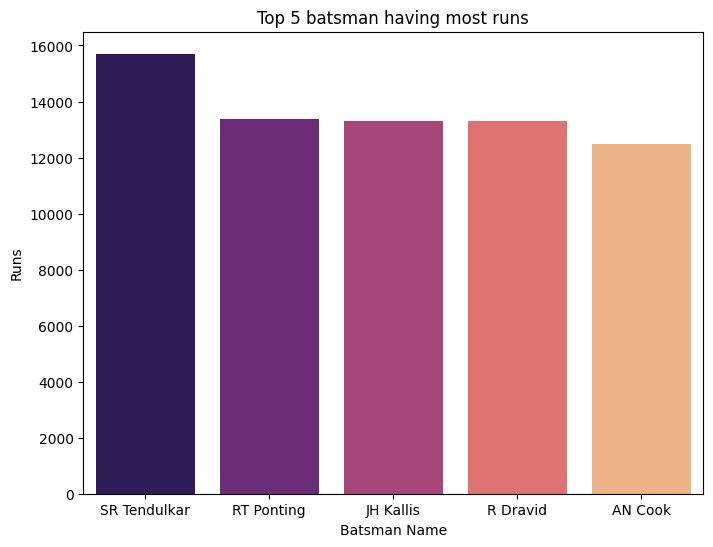

In [65]:
# Visualization plot
plt.figure(figsize=(8, 6))
sns.barplot(x='name', y='runs', data=runs.sort_values(by='runs',ascending=False).head(5), palette="magma")
plt.title('Top 5 batsman having most runs')
plt.xlabel('Batsman Name')
plt.ylabel('Runs')
plt.show()

In [66]:
# Top 20 players having played most number of matches
most_matches = df[df['runs']>8000].sort_values(by='matches',ascending=False).head(20)

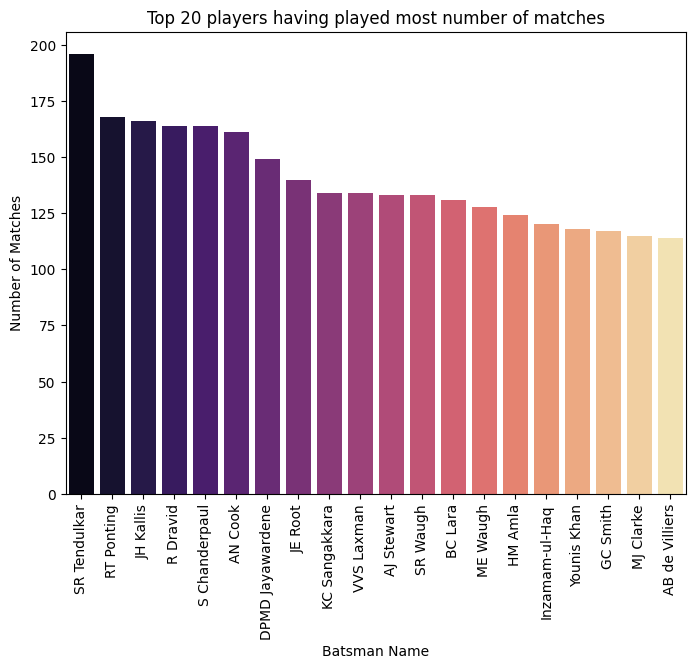

In [67]:
# Visualization plot
plt.figure(figsize=(8, 6))
sns.barplot(x='name', y='matches', data=most_matches, palette="magma")
plt.title('Top 20 players having played most number of matches')
plt.xlabel('Batsman Name')
plt.ylabel('Number of Matches')
plt.xticks(rotation=90)
plt.show()

In [68]:
# Top 10 players with the best average having played atleast 200 matches
best_average = df[df['runs']>8000].sort_values(by='average',ascending=False).head(10)

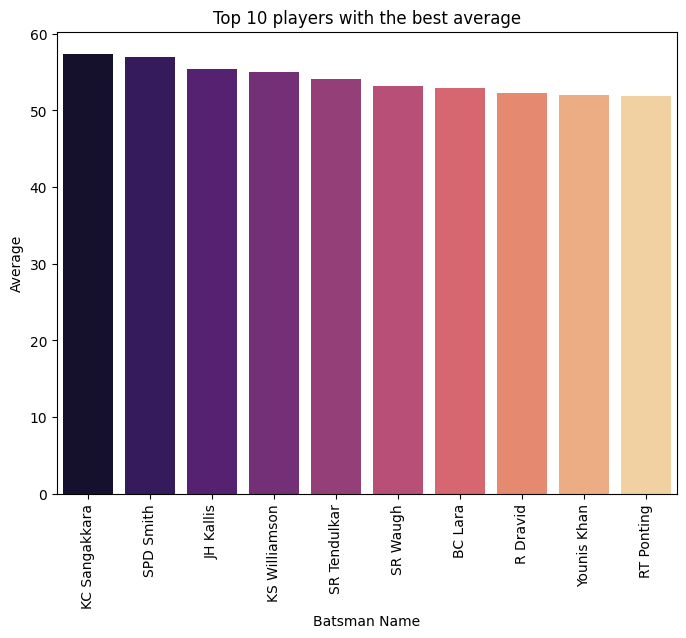

In [69]:
# Visualization plot
plt.figure(figsize=(8, 6))
sns.barplot(x='name', y='average', data=best_average, palette="magma")
plt.title('Top 10 players with the best average')
plt.xlabel('Batsman Name')
plt.ylabel('Average')
plt.xticks(rotation=90)
plt.show()

In [70]:
# Top 15 players with most number of centuries
most_century = df.sort_values(by='century',ascending=False).head(15)

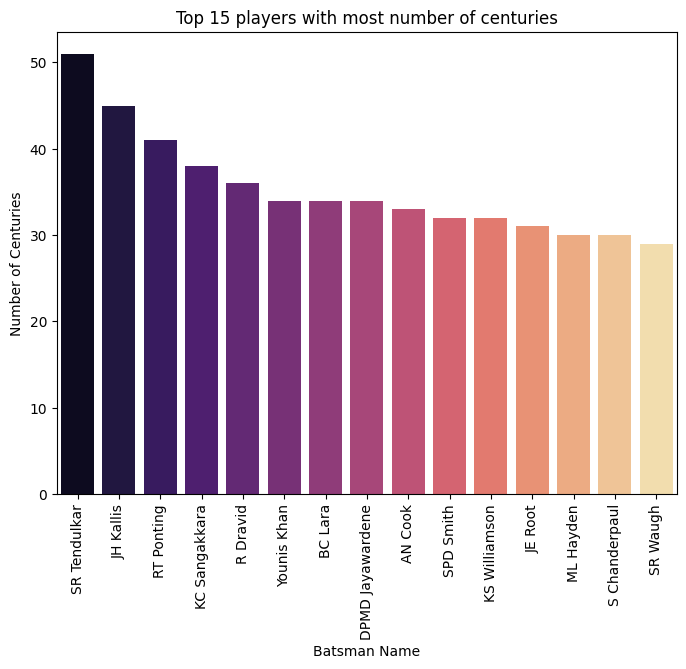

In [71]:
# Visualization plot
plt.figure(figsize=(8, 6))
sns.barplot(x='name', y='century', data = most_century, palette="magma")
plt.title('Top 15 players with most number of centuries')
plt.xlabel('Batsman Name')
plt.ylabel('Number of Centuries')
plt.xticks(rotation=90)
plt.show()

In [72]:
# Top 15 players with most number of half-centuries
half_century = df.sort_values(by='half_century',ascending=False).head(15)

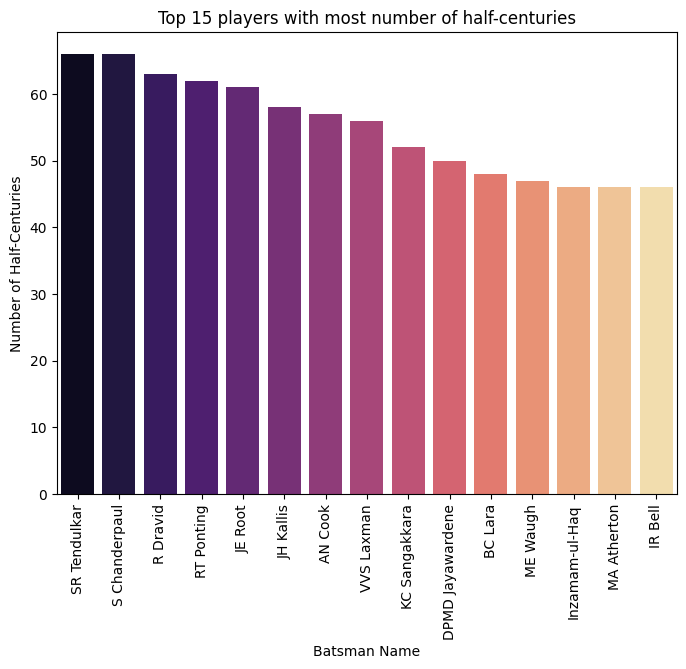

In [73]:
# Visualization plot
plt.figure(figsize=(8, 6))
sns.barplot(x='name', y='half_century', data = half_century, palette="magma")
plt.title('Top 15 players with most number of half-centuries')
plt.xlabel('Batsman Name')
plt.ylabel('Number of Half-Centuries')
plt.xticks(rotation=90)
plt.show()

In [74]:
# Top 15 players with most number of ducks
most_ducks = df[df['runs']>8000].sort_values(by='ducks',ascending=False).head(15)

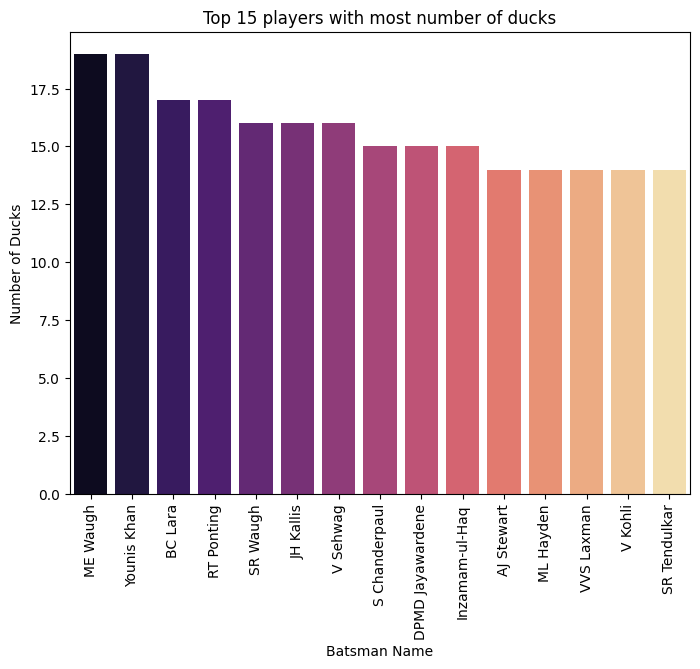

In [75]:
# Visualization plot
plt.figure(figsize=(8, 6))
sns.barplot(x='name', y='ducks', data = most_ducks, palette="magma")
plt.title('Top 15 players with most number of ducks')
plt.xlabel('Batsman Name')
plt.ylabel('Number of Ducks')
plt.xticks(rotation=90)
plt.show()

In [76]:
# Top 15 players with most number of not-outs
most_notouts = df[df['runs']>8000].sort_values(by='not_out',ascending=False).head(15)

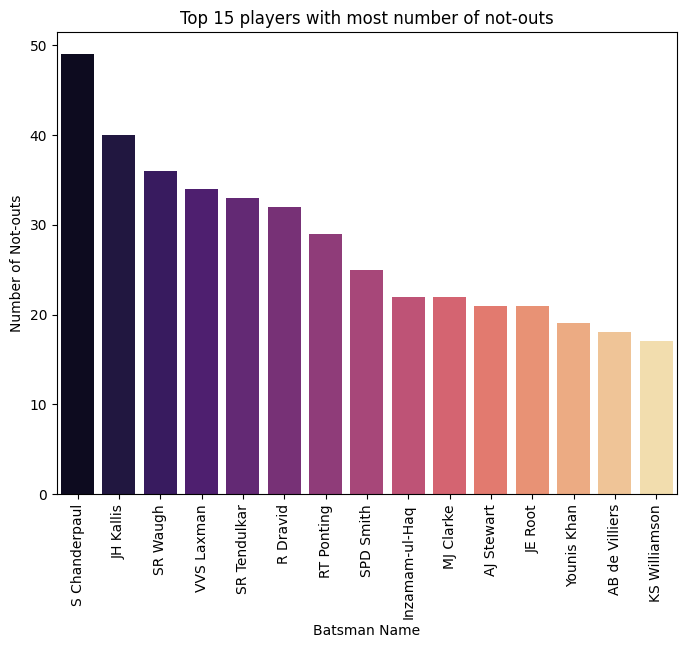

In [77]:
# Visualization plot
plt.figure(figsize=(8, 6))
sns.barplot(x='name', y='not_out', data = most_notouts, palette="magma")
plt.title('Top 15 players with most number of not-outs')
plt.xlabel('Batsman Name')
plt.ylabel('Number of Not-outs')
plt.xticks(rotation=90)
plt.show()

In [78]:
df2.head()

,name,span,matches,innings,overs,maiden_overs,runs_conceded,wickets,best_bowling_inning,best_bowling_match,average,economy_rate,bowling_strike_rate,five_wickets_haul,ten_wickets_haul,country
0,M Muralidaran,1992-2010,133,230,7339.5,1794,18180,800,9/51,16/220,22.72,2.47,55.0,67,22,SL
1,SK Warne,1992-2007,145,273,6784.1,1761,17995,708,8/71,12/128,25.41,2.65,57.4,37,10,AUS
2,JM Anderson,2003-2024,187,348,6646.1,1720,18569,700,7/42,11/71,26.52,2.79,56.9,32,3,ENG
3,A Kumble,1990-2008,132,236,6808.2,1576,18355,619,10/74,14/149,29.65,2.69,65.9,35,8,IND
4,SCJ Broad,2007-2023,167,309,5616.2,1304,16719,604,8/15,11/121,27.68,2.97,55.7,20,3,ENG


In [79]:
# Top 15 bowlers with most number of maiden overs
most_maiden = df2.sort_values(by='maiden_overs',ascending=False).head(15)

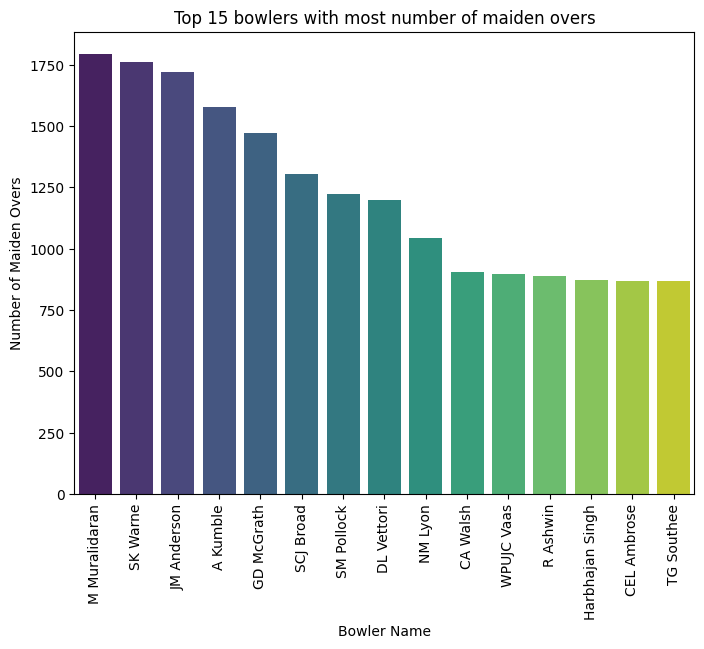

In [80]:
# Visualization plot
plt.figure(figsize=(8, 6))
sns.barplot(x='name', y='maiden_overs', data = most_maiden, palette="viridis")
plt.title('Top 15 bowlers with most number of maiden overs')
plt.xlabel('Bowler Name')
plt.ylabel('Number of Maiden Overs')
plt.xticks(rotation=90)
plt.show()

In [81]:
# Top 20 bowlers with most number of wickets
most_wicket = df2.sort_values(by='wickets',ascending=False).head(20)

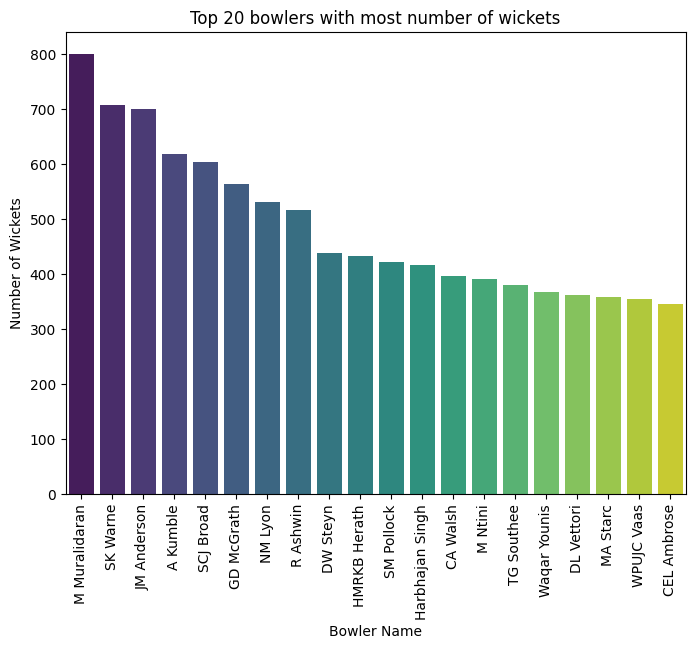

In [82]:
# Visualization plot
plt.figure(figsize=(8, 6))
sns.barplot(x='name', y='wickets', data = most_wicket, palette="viridis")
plt.title('Top 20 bowlers with most number of wickets')
plt.xlabel('Bowler Name')
plt.ylabel('Number of Wickets')
plt.xticks(rotation=90)
plt.show()

In [83]:
# Top 10 bowlers with most number of runs conceded
most_runs_conc = df2.sort_values(by='runs_conceded',ascending=False).head(10)

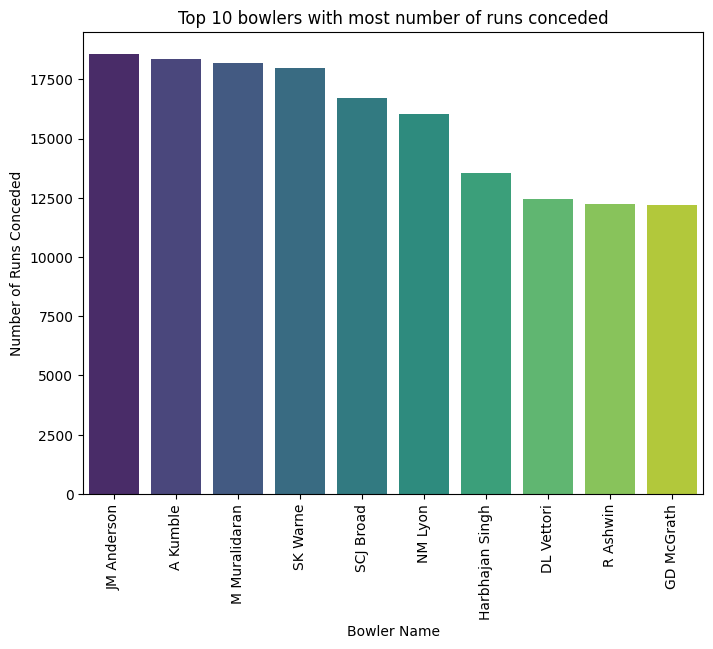

In [84]:
# Visualization plot
plt.figure(figsize=(8, 6))
sns.barplot(x='name', y='runs_conceded', data = most_runs_conc, palette="viridis")
plt.title('Top 10 bowlers with most number of runs conceded')
plt.xlabel('Bowler Name')
plt.ylabel('Number of Runs Conceded')
plt.xticks(rotation=90)
plt.show()

In [85]:
# Top 10 bowlers with the best economy having bowled more than 5000 overs
best_eco = df2[df2['overs']>4000].sort_values(by='economy_rate',ascending=True).head(10)

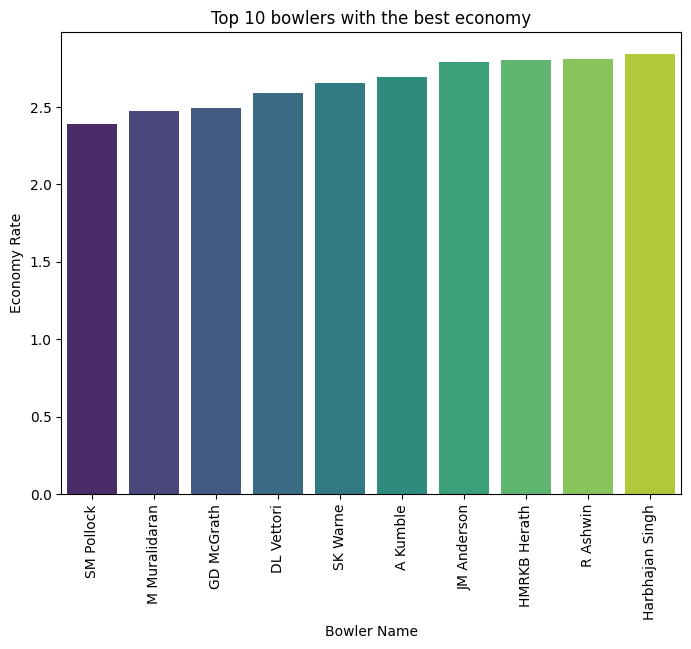

In [86]:
# Visualization plot
plt.figure(figsize=(8, 6))
sns.barplot(x='name', y='economy_rate', data = best_eco, palette="viridis")
plt.title('Top 10 bowlers with the best economy')
plt.xlabel('Bowler Name')
plt.ylabel('Economy Rate')
plt.xticks(rotation=90)
plt.show()

In [87]:
# Top 10 bowlers with the best bowling average having bowled more than 2000 overs
best_aver = df2[df2['overs']>4000].sort_values(by='average',ascending=True).head(20)

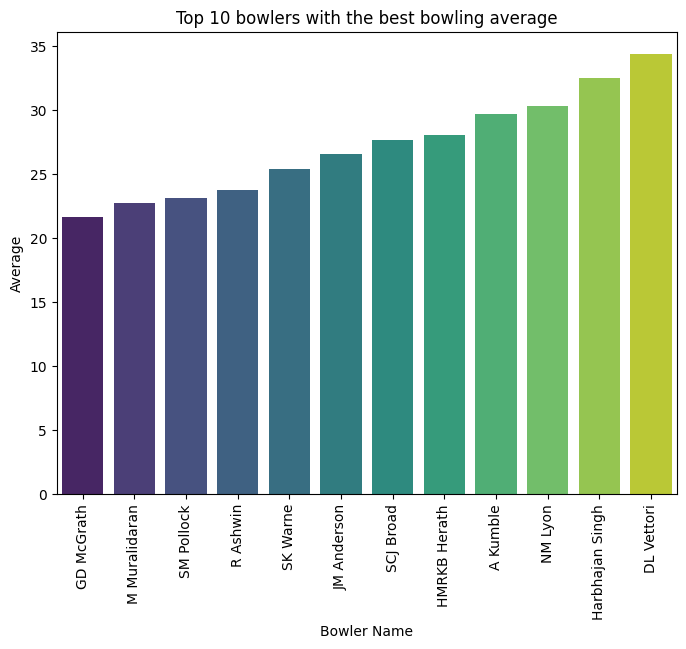

In [88]:
# Visualization plot
plt.figure(figsize=(8, 6))
sns.barplot(x='name', y='average', data = best_aver, palette="viridis")
plt.title('Top 10 bowlers with the best bowling average')
plt.xlabel('Bowler Name')
plt.ylabel('Average')
plt.xticks(rotation=90)
plt.show()

In [89]:
# Top 10 bowlers with most number of five wicket haul
best_haul = df2.sort_values(by='five_wickets_haul',ascending=False).head(10)

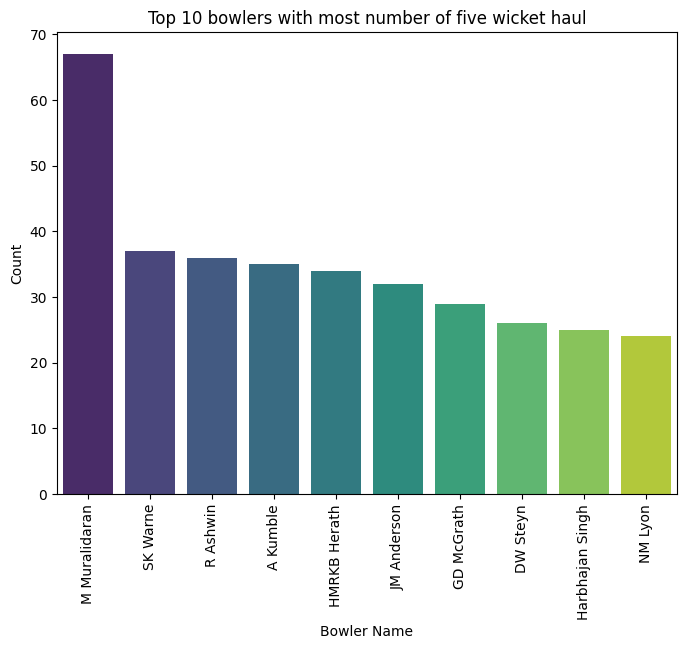

In [90]:
# Visualization plot
plt.figure(figsize=(8, 6))
sns.barplot(x='name', y='five_wickets_haul', data = best_haul, palette="viridis")
plt.title('Top 10 bowlers with most number of five wicket haul')
plt.xlabel('Bowler Name')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [91]:
# Top 10 bowlers with most number of ten wicket haul
best_h = df2.sort_values(by='ten_wickets_haul',ascending=False).head(10)

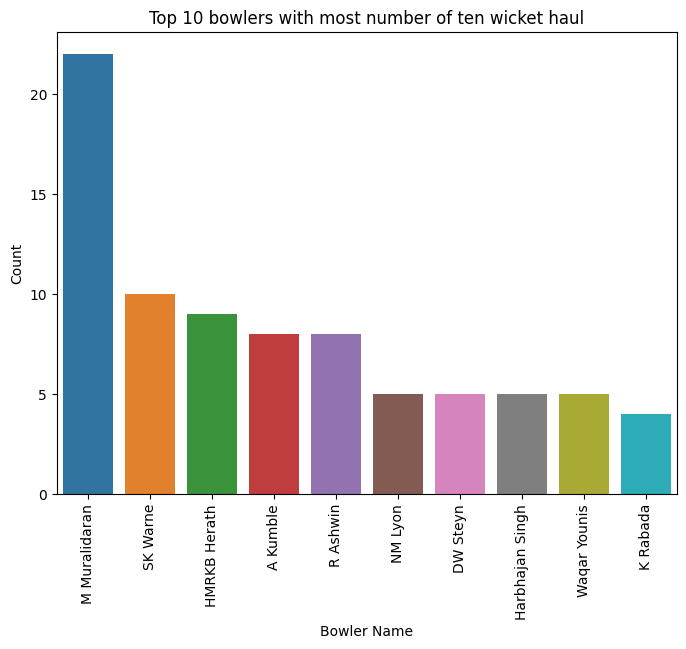

In [92]:
# Visualization plot
plt.figure(figsize=(8, 6))
sns.barplot(x='name', y='ten_wickets_haul', data = best_h)
plt.title('Top 10 bowlers with most number of ten wicket haul')
plt.xlabel('Bowler Name')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [93]:
# all round performance track
merge_df = pd.merge(df, df2, on='name', how='inner')

In [94]:
all_round = merge_df[(merge_df['runs']>5000) & (merge_df['wickets']>100)]

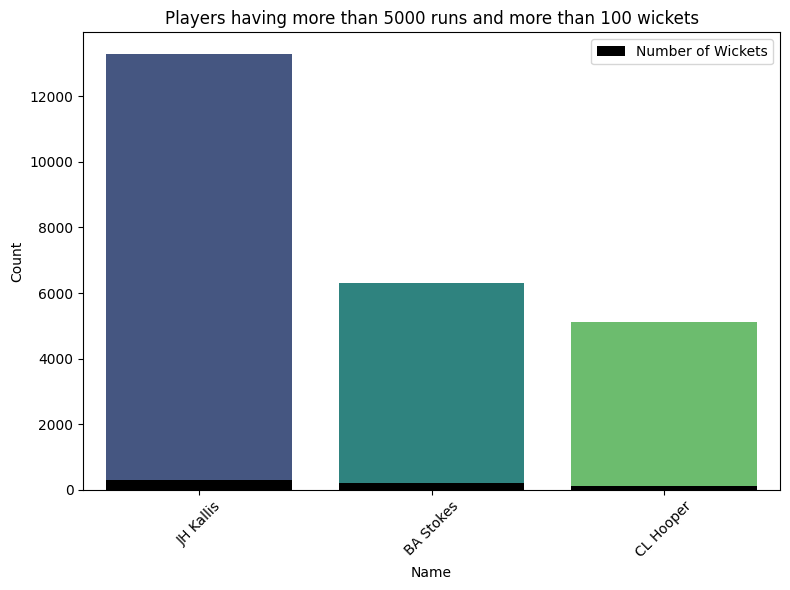

In [95]:
# Visualization plot
fig, ax = plt.subplots(figsize=(8, 6))  # Create a figure and single subplot

# Plot the first bar chart
sns.barplot(x='name', y="runs", data=all_round, ax=ax , palette="viridis")

# Plot the second bar chart on the same subplot with slight right shift
sns.barplot(x="name", y="wickets", data=all_round, ax=ax, label="Number of Wickets", color='black')  # Adjust color as desired

# Adjust x-axis labels to avoid overlapping bars
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Add labels and title
plt.xlabel("Name")
plt.ylabel("Count")
plt.title("Players having more than 5000 runs and more than 100 wickets")
plt.legend()  # Show legend for clarity
plt.tight_layout()  # Adjust spacing for readability

plt.show()